In [33]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('swadesh')
from nltk import word_tokenize
from nltk.corpus import stopwords
from urllib import request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import RegexpTokenizer
url = 'https://en.wikipedia.org/wiki/League_of_Legends'
r = requests.get(url)

In [3]:
html = r.text
html

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>League of Legends - Wikipedia, la enciclopedia libre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limi

In [4]:
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>League of Legends - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-

In [5]:
text = soup.get_text()
text

'\n\n\n\nLeague of Legends - Wikipedia, la enciclopedia libre\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIr al contenido\n\n\n\n\n\n\n\nMenú principal\n\n\n\n\n\nMenú principal\nmover a la barra lateral\nocultar\n\n\n\n\t\tNavegación\n\t\n\n\nPortadaPortal de la comunidadActualidadCambios recientesPáginas nuevasPágina aleatoriaAyudaNotificar un error\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBuscar\n\n\n\n\n\n\n\n\n\n\n\nBuscar\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nApariencia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDonaciones\n\nCrear una cuenta\n\nAcceder\n\n\n\n\n\n\n\n\nHerramientas personales\n\n\n\n\n\nDonaciones Crear una cuenta Acceder\n\n\n\n\n\n\t\tPáginas para editores desconectados más información\n\n\n\nContribucionesDiscusión\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContenidos\nmover a la barra lateral\nocultar\n\n\n\n\nInicio\n\n\n\n\n\n1\nJugabilidad\n\n\n\n\nAlternar subsección Jugabilidad\n\n\n\n\n\n1.1\nGrieta del invocad

In [6]:
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens = [token.lower() for token in tokens]
tokens[:10]

['league',
 'of',
 'legends',
 'wikipedia',
 'la',
 'enciclopedia',
 'libre',
 'ir',
 'al',
 'contenido']

In [7]:
text = nltk.Text(tokens)
text.collocations()

archivado desde; 2020 consultado; riot games; del juego; los
jugadores; 2021 consultado; deportes electrónicos; inglés
estadounidense; wolf jacob; inglés archivado; teamfight tactics;
campeonato mundial; dijo que; lee julia; webster andrew; washington
post; guide espn; esta clasificación; rift herald; del invocador


## Medida de riqueza lexica en un texto:
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$


In [8]:
vocabulario = sorted(set(text))
vocabulario[1000:1050]

['eeuu82',
 'effort',
 'ejecuta',
 'ejecutar',
 'ejecutivo',
 'ejemplo',
 'ekko',
 'el',
 'elección',
 'electrónicos',
 'electrónicoscategorías',
 'elegidos',
 'elementos',
 'elijan',
 'eliminación',
 'eliminados',
 'eliminando',
 'eliminar',
 'eliminaron',
 'ella',
 'elogiados',
 'elogios',
 'elogió',
 'emanan',
 'emily',
 'emmy',
 'emotion',
 'emparejamiento',
 'emplea',
 'empresa',
 'empresarios',
 'en',
 'enables',
 'encarga',
 'enciclopedia',
 'encontrar',
 'encuentran',
 'encuesta',
 'end',
 'ending',
 'enemiga',
 'enemigas',
 'enemigo',
 'enemigos',
 'enemy',
 'enero',
 'enfoque',
 'enfriamiento',
 'engadget',
 'engaño']

In [11]:
# luego definimos la medida de riqueza léxica:
# podemos definir funciones en python para estas medidas léxicas:
def riqueza_lexica(texto):
  return len(set(texto))/len(texto)

def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

riqueza_lexica(text)

0.21725508176677366

In [13]:
# podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.
porcentaje_palabra('champion', text)

0.06113403637475164

In [16]:
# y calcular en conteo el numero de veces que aparece:
text.count('champion')

8

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`

In [18]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text.count(palabra)
dic

{'poderosos': 1,
 'championships': 1,
 'conocen': 1,
 'británico': 3,
 'sport': 1,
 'sole': 1,
 'posibilidad': 1,
 'phil': 2,
 'obtuvo': 1,
 'obtener': 1,
 'more': 8,
 'ucranianowikipedia': 1,
 'oeste': 1,
 'georgeartista': 1,
 'antiguos': 1,
 'desarrollados': 1,
 'género': 3,
 'champion': 8,
 'rojos': 1,
 'rp': 2,
 'inspired': 1,
 'generan': 1,
 'experience': 4,
 '108': 1,
 'es': 17,
 '67': 2,
 'ashton': 1,
 'العربيةمصرىasturianuazərbaycancaбългарскиব': 1,
 'harvard': 1,
 'notably': 1,
 'announced': 3,
 'each': 2,
 'zendle': 1,
 'operativos': 2,
 'otros': 19,
 'eliminación': 1,
 'campos': 2,
 'again': 1,
 'artes': 1,
 'do': 2,
 'mccall': 1,
 'threat': 1,
 '10': 36,
 'personales': 2,
 'las': 20,
 'acumular': 2,
 'other': 2,
 'comparó': 1,
 'storm': 2,
 'deadline': 1,
 '160': 1,
 'donaciones': 2,
 'sostenido': 1,
 '20': 28,
 'units': 1,
 'korea': 1,
 'características': 2,
 '32': 1,
 'arrives': 1,
 'utilizado': 1,
 'principalmente': 2,
 'việt吴语中文文言閩南語': 1,
 'controlling': 1,
 'killed': 1

In [23]:
# NLTK tiene un metodo muy eficiente
fdist = nltk.FreqDist(text)
fdist.most_common(20)

[('de', 1449),
 ('el', 667),
 ('of', 261),
 ('en', 223),
 ('2020', 221),
 ('league', 202),
 ('legends', 192),
 ('desde', 179),
 ('consultado', 172),
 ('original', 171),
 ('archivado', 170),
 ('los', 160),
 ('a', 151),
 ('la', 146),
 ('2021', 139),
 ('y', 137),
 ('the', 131),
 ('que', 120),
 ('juego', 91),
 ('un', 89)]

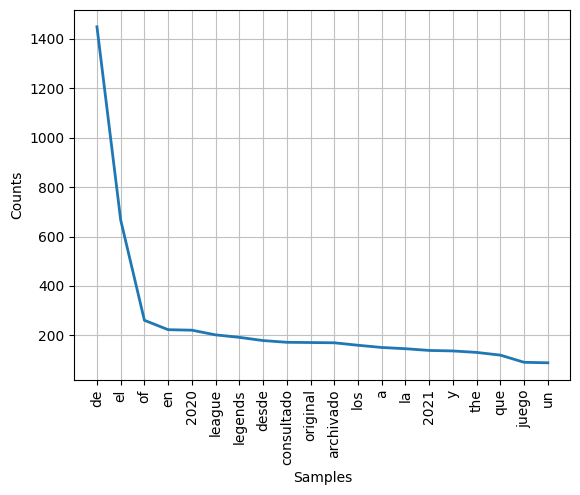

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
fdist.plot(20)

In [25]:
fdist['champion']

8

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo.
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [28]:
# Tal vez sea más interesante estudiar palabras que tengan una longitud minima especifica
long_words = [palabra for palabra in text if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:20]

['1555412015590063',
 '163360595',
 '17032434n',
 '2009juegos',
 '2009videojuegos',
 '21plataformas',
 '279146973',
 '3415229',
 '6876149416769889730007',
 'abandonó',
 'abismo',
 'abordar',
 'abordaron',
 'abrirse',
 'abusivo',
 'acceder',
 'accesibilidad',
 'accesible',
 'accesorios',
 'accessories']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [31]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'U10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([('kotaku',  14), ('personajes',  14), ('lanzamient',  18),
       ('polygon',  22), ('agosto',  23), ('editar',  23),
       ('review',  25), ('equipo',  26), ('campeones',  39),
       ('inglés',  45), ('jugadores',  47), ('diciembre',  62),
       ('octubre',  64), ('septiembre',  66), ('noviembre',  71),
       ('archivado', 170), ('original', 171), ('consultado', 172),
       ('legends', 192), ('league', 202)],
      dtype=[('word', '<U10'), ('frequency', '<i8')])

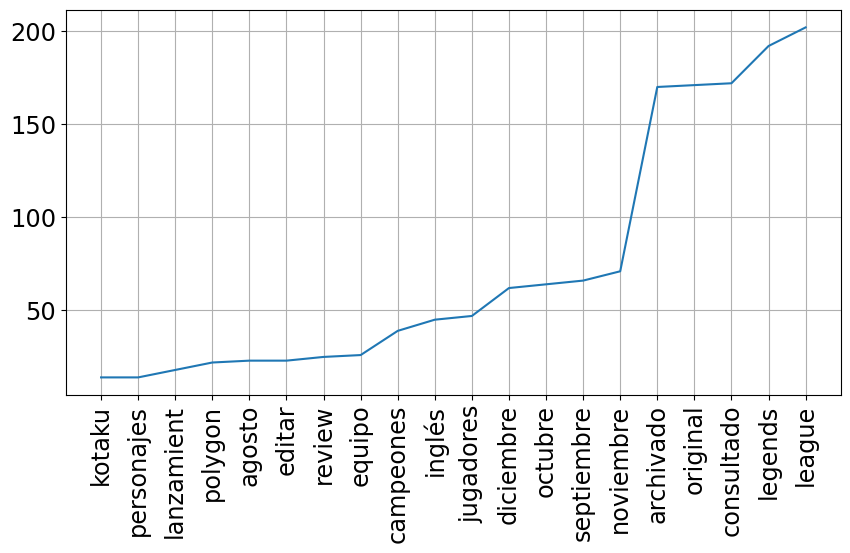

In [32]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()

#Bi-gramas
* Parejas de palabras que ocurren consecutivas.

In [37]:
md_bigrams = list(nltk.bigrams(text))
fdist = nltk.FreqDist(md_bigrams)
md_bigrams[:10]

[('league', 'of'),
 ('of', 'legends'),
 ('legends', 'wikipedia'),
 ('wikipedia', 'la'),
 ('la', 'enciclopedia'),
 ('enciclopedia', 'libre'),
 ('libre', 'ir'),
 ('ir', 'al'),
 ('al', 'contenido'),
 ('contenido', 'menú')]

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [38]:
fdist.most_common(10)

[(('de', '2020'), 209),
 (('league', 'of'), 191),
 (('of', 'legends'), 188),
 (('desde', 'el'), 173),
 (('consultado', 'el'), 172),
 (('archivado', 'desde'), 170),
 (('el', 'original'), 170),
 (('original', 'el'), 170),
 (('de', '2021'), 132),
 (('de', 'enero'), 89)]

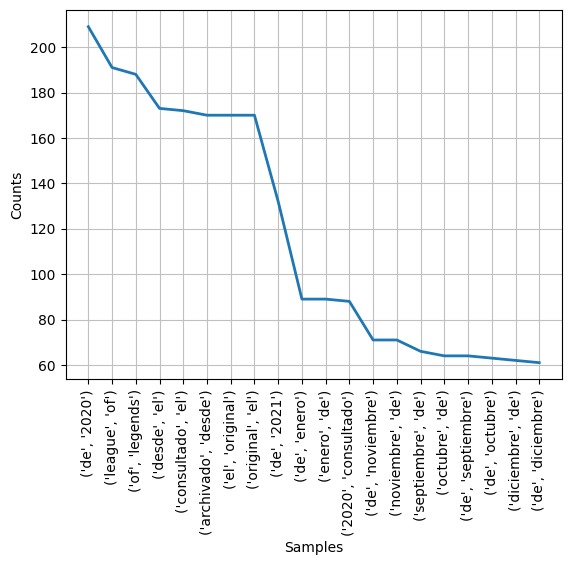

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
fdist.plot(20)

## Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

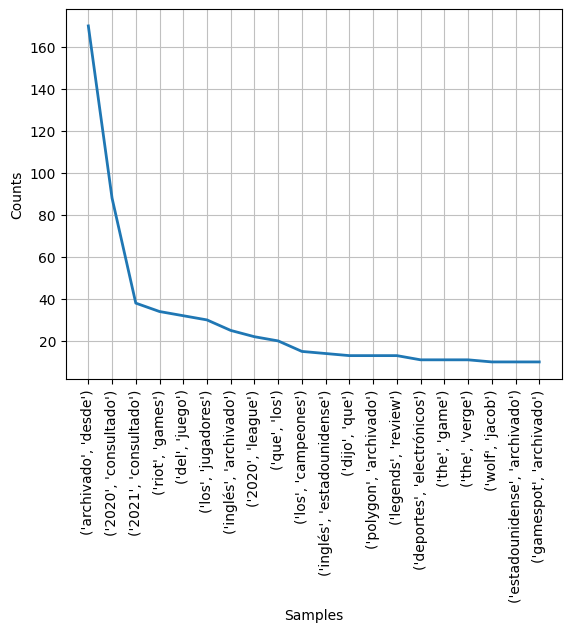

<Axes: xlabel='Samples', ylabel='Counts'>

In [41]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = nltk.FreqDist(filtered_bigrams)
filtered_dist.plot(20)

# Tri-gramas

In [44]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text,3))
fdist = nltk.FreqDist(md_trigrams)
md_trigrams[:10]

[('league', 'of', 'legends'),
 ('of', 'legends', 'wikipedia'),
 ('legends', 'wikipedia', 'la'),
 ('wikipedia', 'la', 'enciclopedia'),
 ('la', 'enciclopedia', 'libre'),
 ('enciclopedia', 'libre', 'ir'),
 ('libre', 'ir', 'al'),
 ('ir', 'al', 'contenido'),
 ('al', 'contenido', 'menú'),
 ('contenido', 'menú', 'principal')]

In [45]:
fdist.most_common(10)

[(('league', 'of', 'legends'), 188),
 (('archivado', 'desde', 'el'), 170),
 (('desde', 'el', 'original'), 170),
 (('el', 'original', 'el'), 170),
 (('de', 'enero', 'de'), 89),
 (('de', '2020', 'consultado'), 88),
 (('2020', 'consultado', 'el'), 88),
 (('enero', 'de', '2021'), 76),
 (('de', 'noviembre', 'de'), 71),
 (('de', 'septiembre', 'de'), 64)]

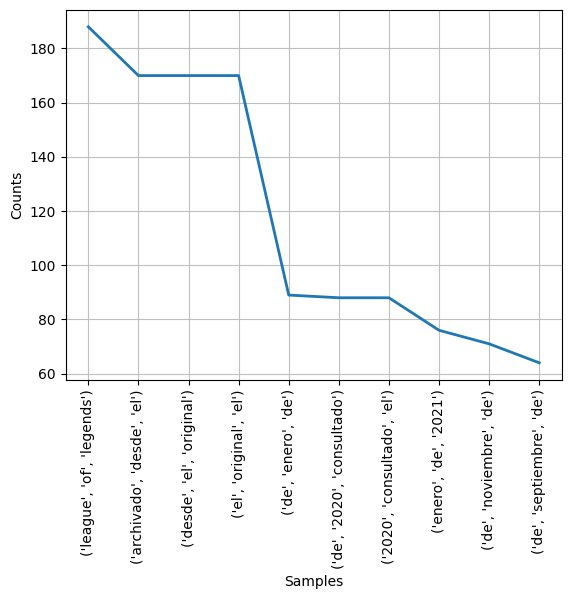

<Axes: xlabel='Samples', ylabel='Counts'>

In [46]:
fdist.plot(10)

# Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [47]:
md_bigrams = list(nltk.bigrams(text))

threshold = 2
#distribution of bi-grams
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = nltk.FreqDist(filtered_bigrams)
#distribution of words
filtered_words = [word for word in text if len(word)>threshold]
filtered_word_dist = nltk.FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq
0,"(senior, designer)",senior,designer,2,2,3
1,"(media, awards)",media,awards,2,4,13
2,"(sports, emmy)",sports,emmy,2,4,2
3,"(vuelto, obsoleta)",vuelto,obsoleta,1,1,1
4,"(2020, when)",2020,when,1,221,1
...,...,...,...,...,...,...
3969,"(transformed, the)",transformed,the,1,1,131
3970,"(para, jugar)",para,jugar,1,70,4
3971,"(español, leereditarver)",español,leereditarver,1,2,2
3972,"(con, una)",con,una,2,62,63


# Pointwise Mutual Information (PMI)

Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [48]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
0,"(senior, designer)",senior,designer,2,2,3,-1.584963,1.0
1,"(media, awards)",media,awards,2,4,13,-4.700440,1.0
2,"(sports, emmy)",sports,emmy,2,4,2,-2.000000,1.0
3,"(vuelto, obsoleta)",vuelto,obsoleta,1,1,1,0.000000,0.0
4,"(2020, when)",2020,when,1,221,1,-7.787903,0.0
...,...,...,...,...,...,...,...,...
3969,"(transformed, the)",transformed,the,1,1,131,-7.033423,0.0
3970,"(para, jugar)",para,jugar,1,70,4,-8.129283,0.0
3971,"(español, leereditarver)",español,leereditarver,1,2,2,-2.000000,0.0
3972,"(con, una)",con,una,2,62,63,-10.931476,1.0


In [49]:
df.sort_values(by = 'PMI', ascending=False)

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
1459,"(114, 115)",114,115,1,1,1,0.000000,0.0
3055,"(isometric, perspective)",isometric,perspective,1,1,1,0.000000,0.0
2289,"(137, 138)",137,138,1,1,1,0.000000,0.0
1595,"(powell, steffan)",powell,steffan,1,1,1,0.000000,0.0
293,"(concurrentes, respectivamente)",concurrentes,respectivamente,1,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...
1794,"(the, 2020)",the,2020,1,131,221,-14.821326,0.0
3616,"(legends, los)",legends,los,1,192,160,-14.906891,0.0
2452,"(legends, archivado)",legends,archivado,1,192,170,-14.994353,0.0
643,"(league, archivado)",league,archivado,1,202,170,-15.067602,0.0


In [50]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'],
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values,
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
fig.show()

# Medidas pre-construidas en NLTK

In [51]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text)

In [52]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('riot', 'games'),
 ('a', 'b'),
 ('archivado', 'desde'),
 ('en', 'inglés'),
 ('del', 'juego'),
 ('los', 'jugadores'),
 ('of', 'legends'),
 ('league', 'of'),
 ('inglés', 'archivado'),
 ('2020', 'consultado')]

# Recursos léxicos (lexicons)

*   Son colecciones de palabras o frases que tienen asociadas etiquetas o meta-informacion de algún tipo (POS tags, significados gramaticales, etc ...)

**comentario:** POS (Part of Speech), también llamado etiquetado gramatical o etiquetado de palabras por categorias, consiste en etiquetar la categoria gramatical a la que pertence cada palabra en un volumen de texto, siendo las categorias:

1.   Sustantivos
2.   Adjetivos
3.   Articulos
4.   Pronombres
5.   Verbos
6.   Adverbios
7.   Interjecciones
8.   Preposiciones
9.   Conjunciones

In [53]:
# Vocabularios: palabras únicas en un corpus
vocab = sorted(set(text))

In [54]:
# Distribuciones: frecuencia de aparición
word_freq = nltk.FreqDist(text)

In [57]:
from nltk.corpus import stopwords

In [59]:
# Stopwords: Palabras muy usadas en el lenguaje que usualmente son filtradas en un pipeline de NLP (useless words)
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

## Fraccion de Stopwords en un corpus

In [60]:
def stopwords_percentage(text):
  '''
  aqui usamos un recurso léxico (stopwords) para filtrar un corpus
  '''
  stopwd = stopwords.words('english')
  content = [w  for w in text if w.lower() not in stopwd]
  return len(content)/len(text)

stopwords_percentage(text)

0.9057007488919456

## Lexicons enriquecidos (listas comparativas de palabras)

*   Construyendo diccionarios para traduccion de palabras en diferentes idiomas.

In [64]:
from nltk.corpus import swadesh
#idiomas disponibles
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [65]:
print(swadesh.words('en'))

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

In [66]:
fr2es = swadesh.entries(['fr', 'es'])
print(fr2es)

[('je', 'yo'), ('tu, vous', 'tú, usted'), ('il', 'él'), ('nous', 'nosotros'), ('vous', 'vosotros, ustedes'), ('ils, elles', 'ellos, ellas'), ('ceci', 'este'), ('cela', 'ese, aquel'), ('ici', 'aquí, acá'), ('là', 'ahí, allí, allá'), ('qui', 'quien'), ('quoi', 'que'), ('où', 'donde'), ('quand', 'cuando'), ('comment', 'como'), ('ne...pas', 'no'), ('tout', 'todo'), ('plusieurs', 'muchos'), ('quelques', 'algunos, unos'), ('peu', 'poco'), ('autre', 'otro'), ('un', 'uno'), ('deux', 'dos'), ('trois', 'tres'), ('quatre', 'cuatro'), ('cinq', 'cinco'), ('grand', 'grande'), ('long', 'largo'), ('large', 'ancho'), ('épais', 'gordo'), ('lourd', 'pesado'), ('petit', 'pequeño'), ('court', 'corto'), ('étroit', 'estrecho, angosto'), ('mince', 'delgado, flaco'), ('femme', 'mujer'), ('homme', 'hombre'), ('homme', 'hombre'), ('enfant', 'niño'), ('femme, épouse', 'esposa, mujer'), ('mari, époux', 'esposo, marido'), ('mère', 'madre'), ('père', 'padre'), ('animal', 'animal'), ('poisson', 'pez, pescado'), ('ois

In [67]:
translate = dict(fr2es)
translate['chien']

'perro'

In [68]:
translate['jeter']

'tirar'

# WordNet

In [69]:
nltk.download('omw')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package omw to /root/nltk_data...


In [71]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [72]:
# synset: grupo de sinómimos de una palabra.
ss = wn.synsets('car', lang='eng')
ss

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [73]:
# explorando los synsets
for syn in ss:
  print(syn.name(), ': ', syn.definition())
  for name in syn.lemma_names():
    print(' * ', name)

car.n.01 :  a motor vehicle with four wheels; usually propelled by an internal combustion engine
 *  car
 *  auto
 *  automobile
 *  machine
 *  motorcar
car.n.02 :  a wheeled vehicle adapted to the rails of railroad
 *  car
 *  railcar
 *  railway_car
 *  railroad_car
car.n.03 :  the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
 *  car
 *  gondola
car.n.04 :  where passengers ride up and down
 *  car
 *  elevator_car
cable_car.n.01 :  a conveyance for passengers or freight on a cable railway
 *  cable_car
 *  car


In [74]:

import networkx as nx
import matplotlib.pyplot as plt

In [75]:
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    labels = {}

    def recurse(s):
        if not s in seen:
            seen.add(s)
            labels[s.name] = s.name().split('.')[0]
            graph.add_node(s.name)
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)

    recurse(synset)
    return graph, labels

def draw_text_graph(G, labels):
    plt.figure(figsize=(18,12))
    pos = nx.planar_layout(G, scale=18)
    nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
    nx.draw_networkx_edges(G, pos)
    plt.xticks([])
    plt.yticks([])

## **Hyponyms:** Conceptos que son más especificos que la palabra raiz de la cual derivan.

car.n.01


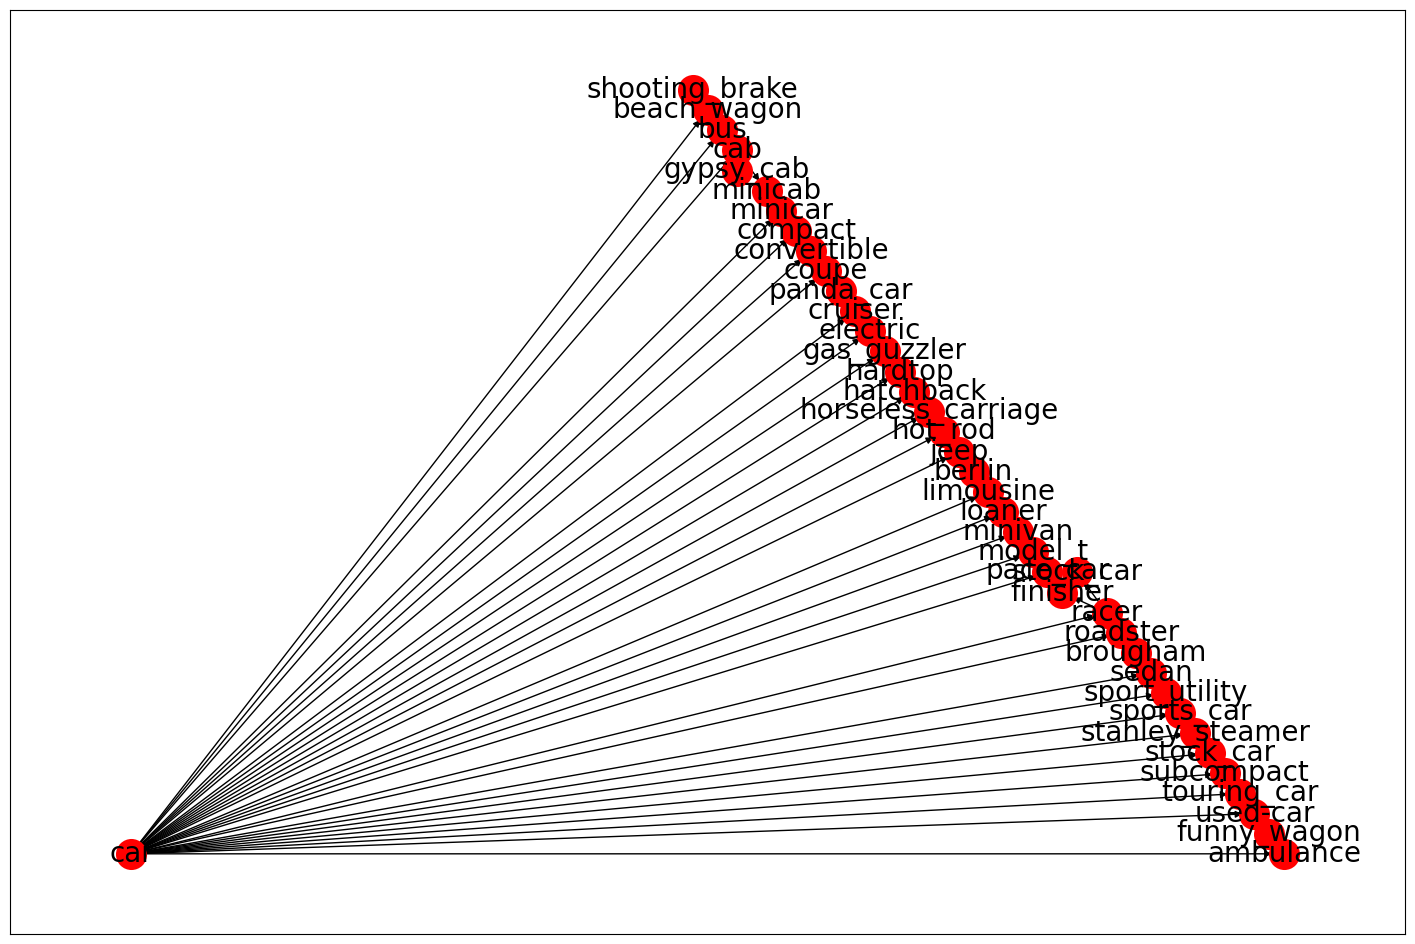

In [76]:
print(ss[0].name())
G, labels = closure_graph(ss[0], fn = lambda s: s.hyponyms())
draw_text_graph(G, labels)

## **Hypernyms**: conceptos que son mas generales !

car.n.01


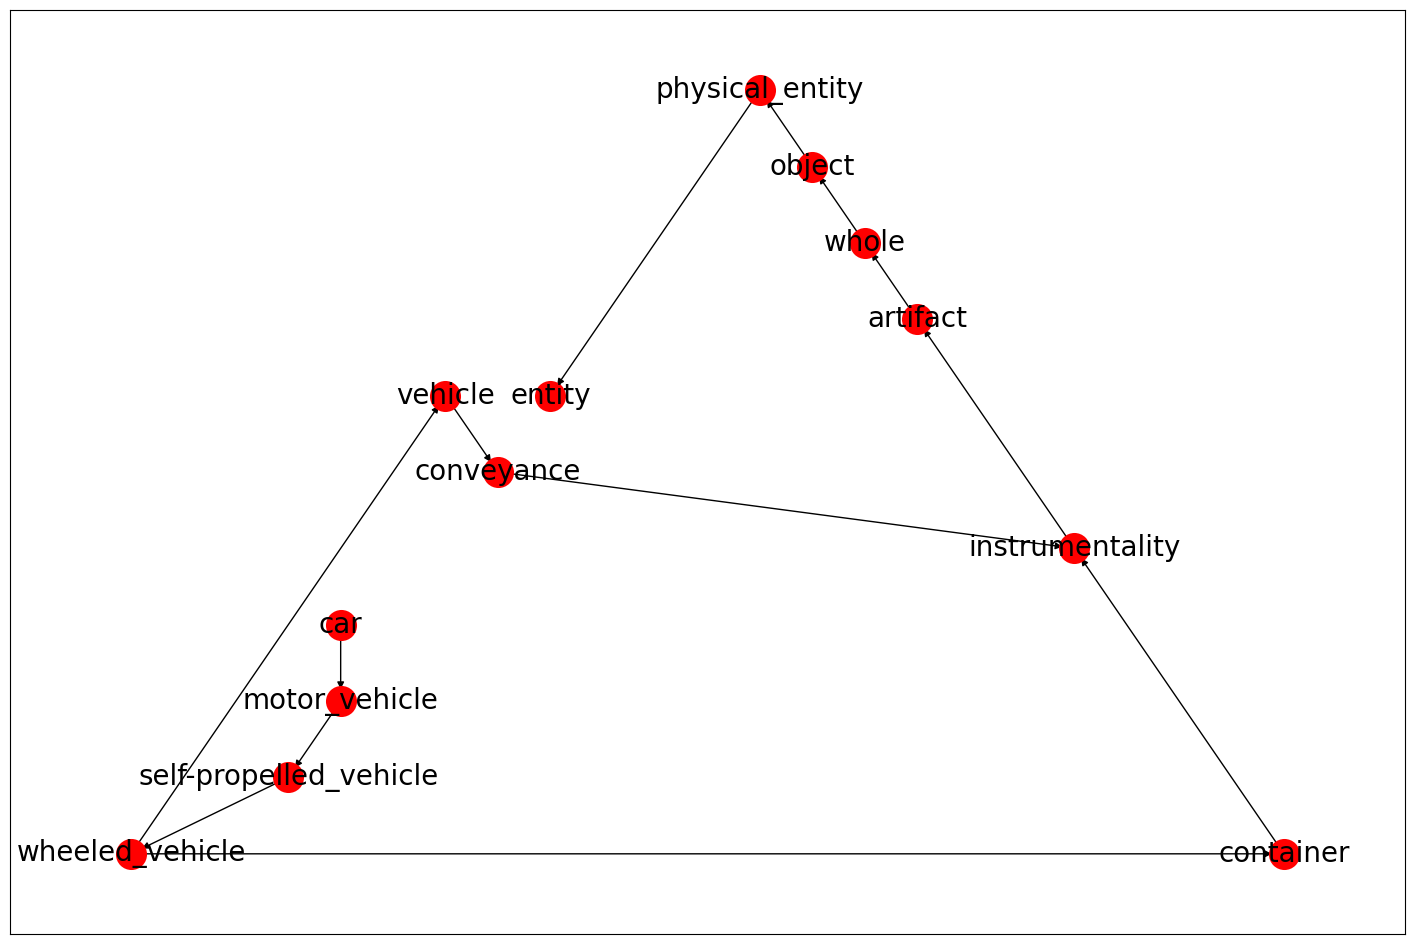

In [77]:
print(ss[0].name())
G, labels = closure_graph(ss[0], fn = lambda s: s.hypernyms())
draw_text_graph(G, labels)

## Similitud Semántica

In [79]:
def show_syns(word):
  ss = wn.synsets(word, lang='eng')
  for syn in ss:
    print(syn.name(), ': ', syn.definition())
    for name in syn.lemma_names():
      print(' * ', name)
  return ss

In [80]:
ss = show_syns('dog')

dog.n.01 :  a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
 *  dog
 *  domestic_dog
 *  Canis_familiaris
frump.n.01 :  a dull unattractive unpleasant girl or woman
 *  frump
 *  dog
dog.n.03 :  informal term for a man
 *  dog
cad.n.01 :  someone who is morally reprehensible
 *  cad
 *  bounder
 *  blackguard
 *  dog
 *  hound
 *  heel
frank.n.02 :  a smooth-textured sausage of minced beef or pork usually smoked; often served on a bread roll
 *  frank
 *  frankfurter
 *  hotdog
 *  hot_dog
 *  dog
 *  wiener
 *  wienerwurst
 *  weenie
pawl.n.01 :  a hinged catch that fits into a notch of a ratchet to move a wheel forward or prevent it from moving backward
 *  pawl
 *  detent
 *  click
 *  dog
andiron.n.01 :  metal supports for logs in a fireplace
 *  andiron
 *  firedog
 *  dog
 *  dog-iron
chase.v.01 :  go after with the intent to catch
 *  chase
 *  chase_after
 *  trail
 *  tail
 *

In [81]:
ss2 = show_syns('cat')

cat.n.01 :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
 *  cat
 *  true_cat
guy.n.01 :  an informal term for a youth or man
 *  guy
 *  cat
 *  hombre
 *  bozo
cat.n.03 :  a spiteful woman gossip
 *  cat
kat.n.01 :  the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant
 *  kat
 *  khat
 *  qat
 *  quat
 *  cat
 *  Arabian_tea
 *  African_tea
cat-o'-nine-tails.n.01 :  a whip with nine knotted cords
 *  cat-o'-nine-tails
 *  cat
caterpillar.n.02 :  a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work
 *  Caterpillar
 *  cat
big_cat.n.01 :  any of several large cats typically able to roar and living in the wild
 *  big_cat
 *  cat
computerized_tomography.n.01 :  a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans

In [82]:
ss3 = show_syns('animal')

animal.n.01 :  a living organism characterized by voluntary movement
 *  animal
 *  animate_being
 *  beast
 *  brute
 *  creature
 *  fauna
animal.s.01 :  marked by the appetites and passions of the body
 *  animal
 *  carnal
 *  fleshly
 *  sensual


In [83]:
perro = ss[0]
gato = ss2[0]
animal = ss3[0]

In [84]:
# similitud entre 'animal' y 'perro'
animal.path_similarity(perro)

0.3333333333333333

In [85]:
# similitud entre 'animal' y 'gato'
animal.path_similarity(gato)

0.125

In [86]:
perro.path_similarity(gato)

0.2

In [87]:
perro.path_similarity(perro)

1.0

In [93]:
import networkx as nx
import matplotlib.pyplot as plt

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
            node_size=[16 * graph.degree(n) for n in graph],
            node_color=[graph.depth[n] for n in graph],
            with_labels=False)
    plt.show()


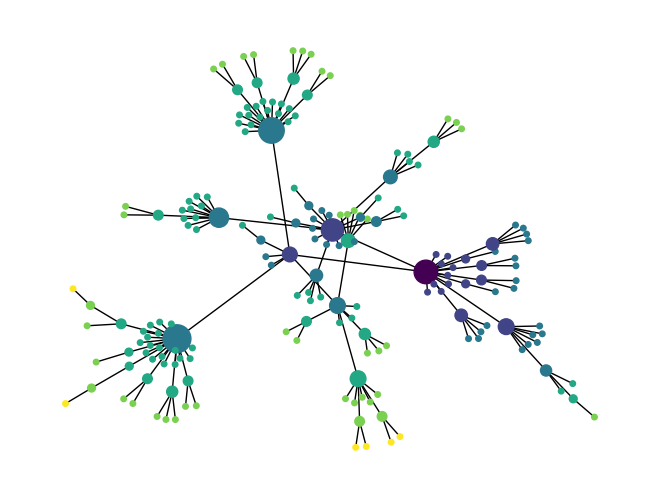

In [94]:
# Ejemplo de uso con WordNet
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)